In [1]:
!pip install tensorflow==2.0.0b1

In [2]:
# checking the version of tensorflow
import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


In [3]:
import seaborn as sns

In [5]:
# defining the plot functiojn
import numpy as np
import matplotlib.pyplot as plt
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

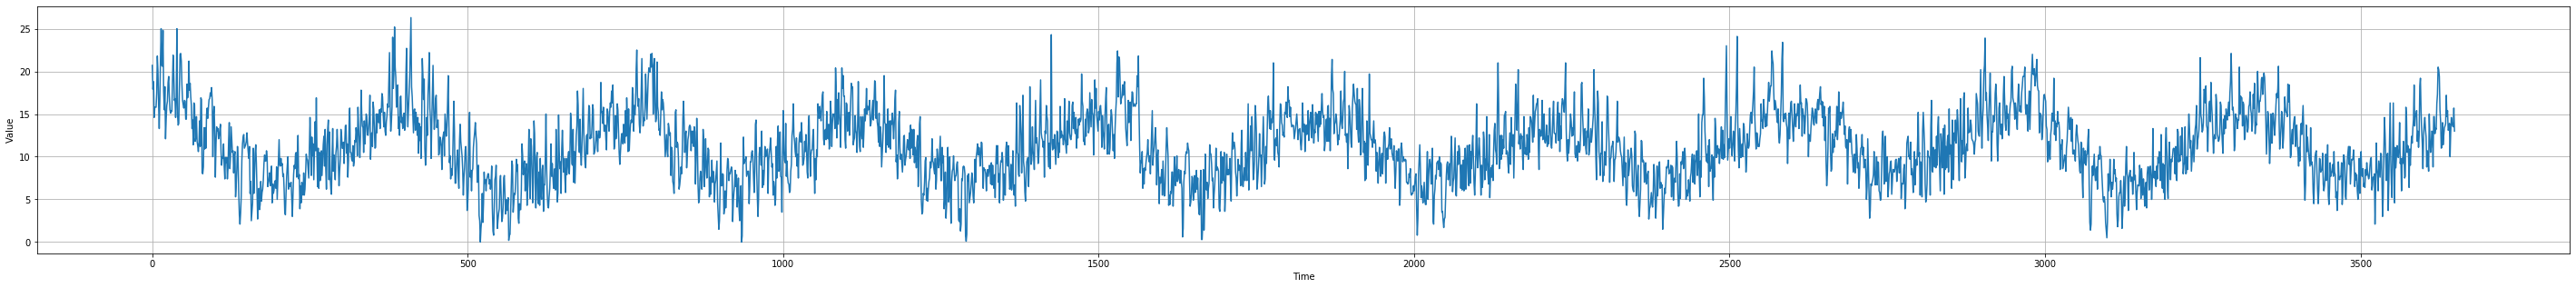

In [16]:
# importing the given file 
import csv
time_step = []
temps = []

with open("D://Datasets-master//Datasets-master//eeg_depression.csv") as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  step=0
  for row in reader:
    temps.append(float(row[1]))
    time_step.append(step)
    step = step + 1

series = np.array(temps)
time = np.array(time_step)
plt.figure(figsize=(50, 5))
plot_series(time, series)

In [17]:
# splitting the data 
# window aize and batch size is created.
split_time = 2500
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 30
batch_size = 32
shuffle_buffer_size = 1000



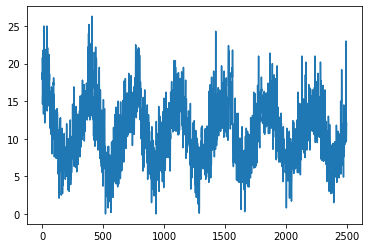

In [18]:
Xtrain=pd.DataFrame(x_train)
plt.plot(Xtrain)

In [19]:
# defining the windowing function this function ensures that the data which is initially very alrge be divided in small parts or small windows of data 
#  it divides the data in chunks and then maps them and drops the reamainder so that each window is of equal size.
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [20]:
# model for forecasting the size of the window or nowing the exact size of the window 
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [21]:
# training the model
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])




W1118 17:11:33.722316 14584 deprecation.py:323] From C:\Users\Abhishek Parashar\Anaconda3\lib\site-packages\tensorflow\python\data\util\random_seed.py:58: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>
(2500,)
Epoch 1/100
10/10 [==============================] - 8s 773ms/step - loss: 31.1549 - mae: 31.6551
Epoch 2/100
10/10 [==============================] - 2s 234ms/step - loss: 30.5696 - mae: 31.0771
Epoch 3/100
10/10 [==============================] - 2s 225ms/step - loss: 29.6691 - mae: 30.1811
Epoch 4/100
10/10 [==============================] - 2s 219ms/step - loss: 28.5431 - mae: 29.0596
Epoch 5/100
10/10 [==============================] - 2s 214ms/step - loss: 27.1744 - mae: 27.6977
Epoch 6/100
10/10 [==============================] - 2s 230ms/step - loss: 25.4676 - mae: 26.0016
Epoch 7/100
10/10 [==============================] - 2s 228ms/step - loss: 23.2987 - mae: 23.8488
Epoch 8/100
10/10 [==============================] - 2s 234ms/step - loss: 20.5506 - mae: 21.1192
Epoch 9/100
10/10 [==============================] - 2s 233ms/step - loss: 17.2409 - mae: 17.8224
Epoch 10/100
10/

10/10 [==============================] - 2s 224ms/step - loss: 9.3594 - mae: 9.7001
Epoch 84/100
10/10 [==============================] - 2s 228ms/step - loss: 11.3421 - mae: 11.9234
Epoch 85/100
10/10 [==============================] - 2s 215ms/step - loss: 12.6920 - mae: 13.1472
Epoch 86/100
10/10 [==============================] - 2s 222ms/step - loss: 14.4583 - mae: 14.8969
Epoch 87/100
10/10 [==============================] - 2s 237ms/step - loss: 16.1927 - mae: 16.5930
Epoch 88/100
10/10 [==============================] - 2s 230ms/step - loss: 18.3364 - mae: 18.8109
Epoch 89/100
10/10 [==============================] - 2s 237ms/step - loss: 20.5180 - mae: 20.8835 0s - loss: 20.2086 - mae: 20.708
Epoch 90/100
10/10 [==============================] - 2s 228ms/step - loss: 23.2028 - mae: 23.6646
Epoch 91/100
10/10 [==============================] - 2s 218ms/step - loss: 25.9735 - mae: 26.3156
Epoch 92/100
10/10 [==============================] - 2s 207ms/step - loss: 29.3256 - mae: 

[1e-08, 0.0001, 0, 60]

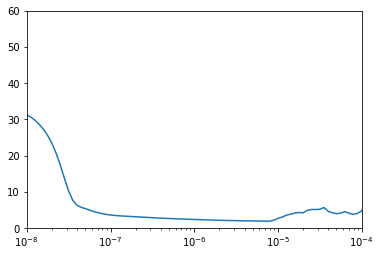

In [22]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 60])

In [23]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=shuffle_buffer_size)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])


optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=150)

Epoch 1/150
25/25 [==============================] - 7s 278ms/step - loss: 9.9624 - mae: 10.5789
Epoch 2/150
25/25 [==============================] - 2s 93ms/step - loss: 2.5390 - mae: 3.0130
Epoch 3/150
25/25 [==============================] - 3s 101ms/step - loss: 1.9265 - mae: 2.3815
Epoch 4/150
25/25 [==============================] - 3s 110ms/step - loss: 1.8597 - mae: 2.3125
Epoch 5/150
25/25 [==============================] - 3s 103ms/step - loss: 1.8181 - mae: 2.2696
Epoch 6/150
25/25 [==============================] - 3s 112ms/step - loss: 1.7882 - mae: 2.2385
Epoch 7/150
25/25 [==============================] - 3s 108ms/step - loss: 1.7618 - mae: 2.2112
Epoch 8/150
25/25 [==============================] - 2s 98ms/step - loss: 1.7382 - mae: 2.1870
Epoch 9/150
25/25 [==============================] - 3s 100ms/step - loss: 1.7167 - mae: 2.1650 2s - loss: 
Epoch 10/150
25/25 [==============================] - 3s 108ms/step - loss: 1.6976 - mae: 2.1454
Epoch 11/150
25/25 [========

25/25 [==============================] - 3s 112ms/step - loss: 1.5038 - mae: 1.9443
Epoch 86/150
25/25 [==============================] - 3s 115ms/step - loss: 1.5033 - mae: 1.9438
Epoch 87/150
25/25 [==============================] - 3s 121ms/step - loss: 1.5028 - mae: 1.9433
Epoch 88/150
25/25 [==============================] - 3s 119ms/step - loss: 1.5023 - mae: 1.9428
Epoch 89/150
25/25 [==============================] - 3s 132ms/step - loss: 1.5018 - mae: 1.9423
Epoch 90/150
25/25 [==============================] - 3s 113ms/step - loss: 1.5012 - mae: 1.9416
Epoch 91/150
25/25 [==============================] - 3s 114ms/step - loss: 1.5003 - mae: 1.9407
Epoch 92/150
25/25 [==============================] - 3s 119ms/step - loss: 1.4991 - mae: 1.9395
Epoch 93/150
25/25 [==============================] - 3s 119ms/step - loss: 1.4983 - mae: 1.9386
Epoch 94/150
25/25 [==============================] - 3s 116ms/step - loss: 1.4976 - mae: 1.9379
Epoch 95/150
25/25 [=======================

In [24]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

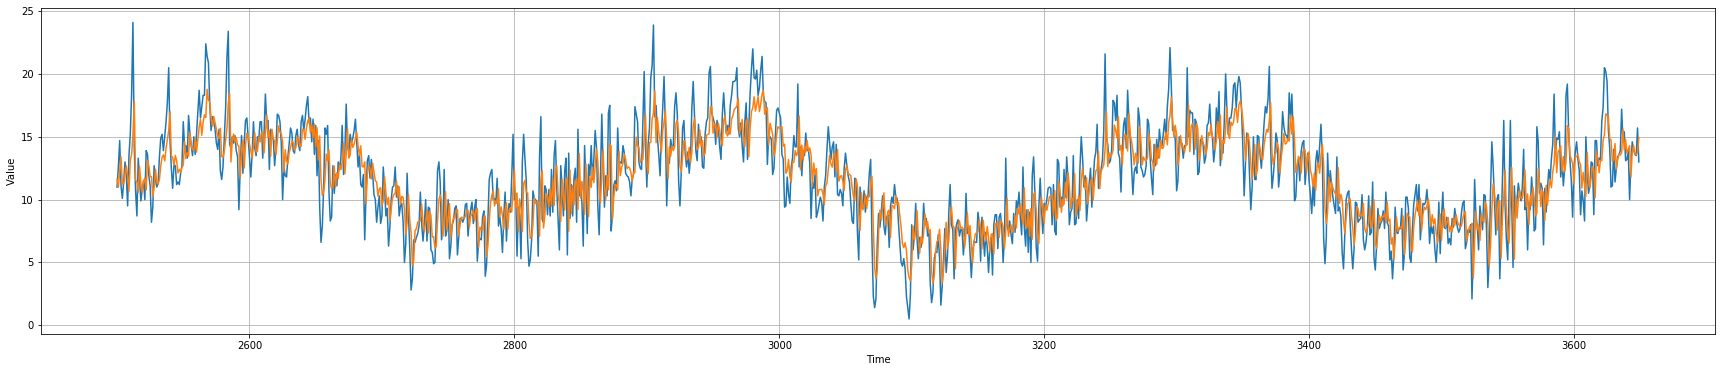

In [29]:
# plotting forecast
plt.figure(figsize=(30, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [26]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

1.7805574

In [28]:
print(rnn_forecast)

[11.6276045 10.978663  12.164911  ... 13.589602  13.725853  14.940667 ]


In [ ]:
# By Abhishek Parashar
